In the last mission, we worked with just one data set, the 2015 World Happiness Report, to explore data aggregation. However, it's very common in practice to work with more than one data set at a time.

Often, you'll find that you need additional data to perform analysis or you'll find that you have the data, but need to pull it from mulitiple sources. In this mission, we'll learn a couple of different techniques for combining data using pandas to easily handle situations like these.

We'll use what we learned in the last mission to analyze the 2015, 2016, and 2017 World Happiness Reports. Specifically, we'll look to answer the following question:

Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

As a reminder, these reports assign each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10, so "world happiness" refers to this definition specifically.

In [29]:
import pandas as pd
import numpy as np

happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

- `Country` - Name of the country
- `Region` - Name of the region the country belongs to
- `Happiness Rank` - The rank of the country, as determined by its happiness score
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10

Adding the `Year` column:

In [30]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

### Combining dataframes with the concat function

Let's start by exploring the pd.concat() function. The concat() function combines dataframes one of two ways:

1) Stacked: Axis = 0 (This is the default option.)

![Imagen](img/concat.png)

2) Side by Side: Axis = 1

![Imagen](img/concat2.png)

Since concat is a function, not a method, we use the syntax below:

![Imagen](img/concat_syntax.png)


In the next exercise, we'll use the concat() function to combine subsets of happiness2015 and happiness2016 and then debrief the results on the following screen.

Below are the subsets we'll be working with:

In [31]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2015

Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015

In [32]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
head_2016

Country  Happiness Score  Year
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016

Combining:

In [33]:
concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis0

Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016

In [34]:
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)
concat_axis1

Country  Happiness Score  Year      Country  Happiness Score  Year
0  Switzerland            7.587  2015      Denmark            7.526  2016
1      Iceland            7.561  2015  Switzerland            7.509  2016
2      Denmark            7.527  2015      Iceland            7.501  2016

When you reviewed the results from the last exercise, you probably noticed that we merely pushed the dataframes together vertically or horizontally - none of the values, column names, or indexes changed. For this reason, when you use the concat() function to combine dataframes with the same shape and index, you can think of the function as "gluing" dataframes together.

![Img](img/glue.png)

However, what happens if the dataframes have different shapes or columns? Let's confirm the concat() function's behavior when we combine dataframes that don't have the same shape in the next exercise.

We'll work with the following subsets:

In [35]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2015

Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880

In [36]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
head_2016

Country  Happiness Score  Year
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016

Combining them..

In [37]:
concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis0

Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880
0  2016      Denmark            7.526             NaN
1  2016  Switzerland            7.509             NaN
2  2016      Iceland            7.501             NaN

In [38]:
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)
concat_axis1

Year      Country  Happiness Score  Standard Error      Country  \
0  2015  Switzerland            7.587         0.03411      Denmark   
1  2015      Iceland            7.561         0.04884  Switzerland   
2  2015      Denmark            7.527         0.03328      Iceland   
3  2015       Norway            7.522         0.03880          NaN   

   Happiness Score    Year  
0            7.526  2016.0  
1            7.509  2016.0  
2            7.501  2016.0  
3              NaN     NaN

### Combining dataframes with different shapes using the concat function.

In the last exercise, we saw that the analogy of "gluing" dataframes together doesn't fully describe what happens when concatenating dataframes of different shapes. Instead, the function combined the data according to the corresponding column names:

![Img](img/concatt.png)


**By default, the concat function will keep ALL of the data, no matter if missing values are created.**


Also, notice again the indexes of the original dataframes didn't change. If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.

Luckily, the concat function has a parameter, ignore_index, that can be used to clear the existing index and reset it in the result. 

In [39]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_update_index = pd.concat([head_2015, head_2016], ignore_index = True)
concat_update_index

Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880
4  2016      Denmark            7.526             NaN
5  2016  Switzerland            7.509             NaN
6  2016      Iceland            7.501             NaN

## Joining dataframes with the Merge function

Next, we'll explore the `pd.merge()` function - a function that can execute high performance database-style joins. Note that unlike the concat function, the merge function only combines dataframes horizontally (`axis=1`) and can only combine two dataframes at a time. However, it can be valuable when we need to combine very large dataframes quickly and provides more flexibility in terms of how data can be combined, as we'll see in the next couple screens.

With the `merge()` function, we'll combine dataframes on a key, a shared index or column. When choosing a key, it's good practice to use keys with unique values to avoid duplicating data.

You can think of keys as creating a link from one dataframe to another using the common values or indexes. For example, in the diagram below, we linked the dataframes using common values in the Country columns.


![Img](img/merge.png)

In the diagram below, we use those common country values to join or merge the dataframes.


![Img](img/merge_ex.png)


We'll explore the merge function in the next exercise using just three rows from happiness2015 and happiness2016:

In [40]:
happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]

Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015

In [41]:
happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016

We'll use the following syntax:

![Img](img/merge_syntax.png)

In [42]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left = three_2015, right = three_2016, on = 'Country')
merged

Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Norway                 4    2015                 4    2016

Joining three_2015 and three_2016 in the last exercise resulted in a dataframe with just one row.

Since we joined the dataframes on the Country column, or used it as the key, the merge() function looked to match elements in the Country column in BOTH dataframes.

![Img](img/both.png)


The one country returned in merged was `"Norway"`, the only element that appeared in the Country column in **BOTH** `three_2015` and `three_2016`.

This way of combining, or joining, data is called an **inner join**. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.

The term "join" originates from SQL (or structured query language), a language used to work with databases. If you're a SQL user, you'll recognize the following concepts. If you've never used SQL, don't worry! No prior knowledge is neccessary for this mission, but we will learn SQL later in this path.

There are actually four different types of joins:

- **Inner**: only includes elements that appear in both dataframes with a common key
- **Outer**: includes all data from both dataframes
- **Left**: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
- **Right**: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

If the definition for outer joins sounds familiar, it's because we've already seen examples of outer joins! Recall that when we combined data using the concat function, it kept all of the data from all dataframes, no matter if missing values were created.

Since it's much more common to use inner and left joins for database-style joins, we'll focus on these join types for the remainder of the mission, but encourage you to explore the other options on your own.

In [43]:
merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged

Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Norway                 4    2015                 4    2016

In [44]:
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', 
                      how = 'left')
merged_left

Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN

In [45]:
merged_left_updated = pd.merge(left=three_2016, 
                               right=three_2015, 
                               on='Country', 
                               how = 'left')
merged_left_updated

Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN

### Left joins with the merge function


A left join includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key.

![Img](img/left_join.png)

Since the Country column was used as the key, only countries that appear in BOTH dataframes have a value in every column. "Norway" was the only value in the Country column in BOTH dataframes, so it's the only row with a value in every column.


We'd use a left join when we don't want to drop any data from the left dataframe.

Note that a right join works the same as a left join, except it includes all of the rows from the "right" dataframe. Since it's far more common in practice to use a left join, we won't cover right joins in detail.

You may have also noticed above that the merge function added a suffix of either \_x or \_y to columns of the same name to distinguish between them.

Let's update those suffixes next to make our results easier to read.

In [46]:
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left',
                          on='Country', suffixes = ('_2016', '_2015'))
merged_updated_suffixes

Country  Happiness Rank_2016  Year_2016  Happiness Rank_2015  Year_2015
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN

### Join on index with the merge function

Now that we have a good understanding of how to join dataframes on specific columns, let's look at another way to join dataframes - on the index.

![Img](img/join_index.png)

In this screen, we'll work with the following two subsets of happiness2015 and happiness2016:

In [47]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
four_2015

Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
5  Finland               6  2015

In [48]:
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016

Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016

We'll join happiness2015 and happiness2016 on index using an inner join, so that the result contains only the elements in the key that appear in BOTH dataframes.

To join on the index, we'll set the left_index and right_index parameters to `True`:

In [49]:
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   

   Happiness Rank_2016  Year_2016  
2                    3       2016  
3                    4       2016  
4                    5       2016

Based on our experience with joining on columns, you may have predicted the output would have just two rows, since only "Finland" and "Norway" appear in both dataframes. When we join on index, however, our result will contain only common indexes.

![Img](img/join_index_ex.png)

Let's explore what happens when we join on index with a left join instead.

In [50]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merge_index = pd.merge(left = four_2015, right = three_2016, left_index = True,                                 
                       right_index = True, suffixes = ('_2015','_2016'))
merge_index

Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   

   Happiness Rank_2016  Year_2016  
2                    3       2016  
3                    4       2016  
4                    5       2016

In [51]:
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True,
                            how = 'left',
                            right_index = True, 
                            suffixes = ('_2015','_2016'))
merge_index_left

Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   
5      Finland                    6       2015          NaN   

   Happiness Rank_2016  Year_2016  
2                  3.0     2016.0  
3                  4.0     2016.0  
4                  5.0     2016.0  
5                  NaN        NaN

Let's summarize what we learned in this mission:

![Img](img/concat_merge.png)

You may still be wondering about when to use each of the functions and methods we've learned. This table can help you understand the limitations of each, but that decision will mostly depend on the problem you're trying to solve.

## Challenge.

#### Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

To answer this question, we'll create a bar plot in which each bar represented the mean happiness score for one of the years. We completed a similar task in the last mission when we calculated the mean happiness score for each region using the df.pivot_table() method:

In [53]:
#Use a pivot table to aggregate the data according to Region.
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)
means

Happiness Score
Region                                          
Australia and New Zealand               7.285000
Central and Eastern Europe              5.332931
Eastern Asia                            5.626167
Latin America and Caribbean             6.144682
Middle East and Northern Africa         5.406900
North America                           7.273000
Southeastern Asia                       5.317444
Southern Asia                           4.580857
Sub-Saharan Africa                      4.202800
Western Europe                          6.689619

Then, we plotted the results with the df.plot() method.

<AxesSubplot:title={'center':'Mean Happiness Scores by Region'}, ylabel='Region'>

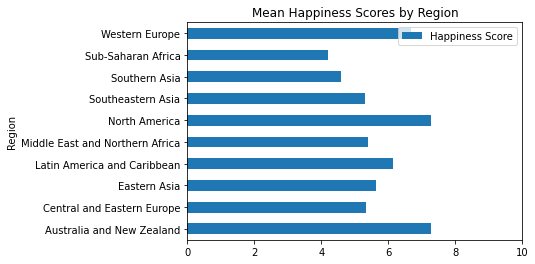

In [54]:
#Use the `df.plot()` method to plot the results.
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

Let's repeat the same steps, but this time, we'll group the data by the Year column. First, let's rename the Happiness.Score column so it matches the column name in happiness2015 and happiness2016:

In [56]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
happiness2017.head()

Country  Happiness.Rank  Happiness Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  Year  
0    0.362012                       0.315964           2.277027  2017  
1    0.355280                       0.400770           2.313707  2017  
2    0.475540                       0.153527           2.322715  2017  
3    0.290549                       0.367007           2.276716  2017  
4    0.245483                       0.382612           2.430182  2017

Next, we need to combine happiness2015, happiness2016, and happiness2017, so that we can group the result by the Year column.

Let's use what we learned in this mission to combine the dataframes.

In [60]:
combined = pd.concat([happiness2015, happiness2016, happiness2017])
combined

Country          Region  Happiness Rank  \
0                 Switzerland  Western Europe             1.0   
1                     Iceland  Western Europe             2.0   
2                     Denmark  Western Europe             3.0   
3                      Norway  Western Europe             4.0   
4                      Canada   North America             5.0   
..                        ...             ...             ...   
150                    Rwanda             NaN             NaN   
151                     Syria             NaN             NaN   
152                  Tanzania             NaN             NaN   
153                   Burundi             NaN             NaN   
154  Central African Republic             NaN             NaN   

     Happiness Score  Standard Error  Economy (GDP per Capita)    Family  \
0              7.587         0.03411                   1.39651  1.349510   
1              7.561         0.04884                   1.30232  1.402230   
2              7.527         0.03328                   1.32548  1.360580   
3              7.522         0.03880                   1.45900  1.330950   
4              7.427         0.03553                   1.32629  1.322610   
..               ...             ...                       ...       ...   
150            3.471             NaN                       NaN  0.945707   
151            3.462             NaN                       NaN  0.396103   
152            3.349             NaN                       NaN  1.041990   
153            2.905             NaN                       NaN  0.629794   
154            2.693             NaN                       NaN  0.000000   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  ...  \
0                     0.94143  0.665570                        0.41978  ...   
1                     0.94784  0.628770                        0.14145  ...   
2                     0.87464  0.649380                        0.48357  ...   
3                     0.88521  0.669730                        0.36503  ...   
4                     0.90563  0.632970                        0.32957  ...   
..                        ...       ...                            ...  ...   
150                       NaN  0.581844                            NaN  ...   
151                       NaN  0.081539                            NaN  ...   
152                       NaN  0.390018                            NaN  ...   
153                       NaN  0.059901                            NaN  ...   
154                       NaN  0.270842                            NaN  ...   

     Year  Lower Confidence Interval  Upper Confidence Interval  \
0    2015                        NaN                        NaN   
1    2015                        NaN                        NaN   
2    2015                        NaN                        NaN   
3    2015                        NaN                        NaN   
4    2015                        NaN                        NaN   
..    ...                        ...                        ...   
150  2017                        NaN                        NaN   
151  2017                        NaN                        NaN   
152  2017                        NaN                        NaN   
153  2017                        NaN                        NaN   
154  2017                        NaN                        NaN   

     Happiness.Rank  Whisker.high  Whisker.low  Economy..GDP.per.Capita.  \
0               NaN           NaN          NaN                       NaN   
1               NaN           NaN          NaN                       NaN   
2               NaN           NaN          NaN                       NaN   
3               NaN           NaN          NaN                       NaN   
4               NaN           NaN          NaN                       NaN   
..              ...           ...          ...                       ...   
150           151.0      3.543030     3.39

In [62]:
#Use a pivot table to aggregate the data according to Region.
means_combined = combined.pivot_table('Happiness Score', 'Year')
means_combined

Happiness Score
Year                 
2015         5.375734
2016         5.382185
2017         5.354019

<AxesSubplot:title={'center':'Happiness per year'}, ylabel='Year'>

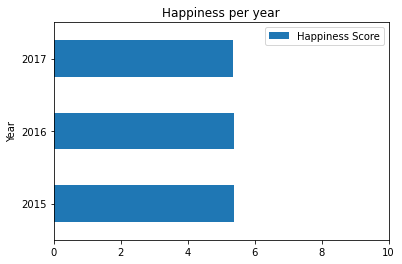

In [64]:
means_combined.plot(kind = 'barh', title='Happiness per year', xlim = (0, 10))

In the last exercise, we confirmed that the mean world happiness score stayed approximately the same from 2015 to 2017.

In this mission, we learned how to combine data using the pd.concat() and pd.merge() functions. In your travels with pandas, you may happen upon the df.append() and df.join() methods, which are basically shortcuts for the concat() and merge() functions. We didn't cover them in this mission, as the differences are few, but if you want to learn more about them, check out this documentation.

As we saw in the last screen, in order to perform more complex analysis, we have to be able to clean and manipulate data, whether it be adding data to a dataframe or renaming a column. In the next mission, we'll continue building on what we've learned so far as we learn ways to transform and reshape our data.